# observations:
01. Temperture and latitude are inversely related. The closer you get to a latitude of 0 the higher the temperture. The farther away you are from a latitude of 0 the lower the temperture.

02. From the data we can see there is no correlation between latitude vs cloudiness, latitude vs wind speed, and latitude vs humidity.

03. In the Northern Hemisphere as the latitude increses the temperture decreses. In the Southern Hemisphere as the latitude increses the temperture increses. 

04. From the linear regression graphs there seems to be no correlation between the Northern and Southern Hemispheres for cloudiness, wind speed, and humidity.


In [ ]:
# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
#http://api.openweathermap.org/data/2.5weather?&appid=f2c3932996b3b8224c5f910ad4e57614&&units=imperial&q=
# I created an empty list of varibles to add to the url.
city_list = []
city_ID = []
lat = []
lng = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
count = 0
set_num = 1
print ("Beginning Data Retrieval")
print ("---------------------------")
#create the for loop
for city in  cities:
    try:
         #pull response varibles from open weather url data, then merged them with the empty list
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        city_ID.append(response['id'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        #set count to max 50, starting from 0 add to count else restart count after max count, add set_num after each max
        if count > 49:
            count = 1
            set_num +=1
        else:
            count +=1
        print (f"proceessing Record {count} of set {set_num} {city}")
    except (KeyError):
        print ("City not found. skipping...")
    
    time.sleep(1)

Beginning Data Retrieval
---------------------------
proceessing Record 1 of set 1 stykkisholmur
proceessing Record 2 of set 1 vaini
proceessing Record 3 of set 1 ushuaia
proceessing Record 4 of set 1 punta arenas
proceessing Record 5 of set 1 saint george
proceessing Record 6 of set 1 apodi
proceessing Record 7 of set 1 port alfred
proceessing Record 8 of set 1 lasa
proceessing Record 9 of set 1 peniche
proceessing Record 10 of set 1 lubango
proceessing Record 11 of set 1 xining
proceessing Record 12 of set 1 takoradi
proceessing Record 13 of set 1 touros
proceessing Record 14 of set 1 atuona
proceessing Record 15 of set 1 kalemie
proceessing Record 16 of set 1 ancud
proceessing Record 17 of set 1 puerto ayora
proceessing Record 18 of set 1 nikolskoye
proceessing Record 19 of set 1 mataura
proceessing Record 20 of set 1 rikitea
proceessing Record 21 of set 1 busselton
proceessing Record 22 of set 1 hobart
proceessing Record 23 of set 1 iqaluit
proceessing Record 24 of set 1 atbasar
pr

City not found. skipping...
City not found. skipping...
proceessing Record 44 of set 4 torbay
proceessing Record 45 of set 4 yulara
proceessing Record 46 of set 4 kurchum
proceessing Record 47 of set 4 isangel
proceessing Record 48 of set 4 konstantinovo
proceessing Record 49 of set 4 besikduzu
proceessing Record 50 of set 4 jimeta
proceessing Record 1 of set 5 bathsheba
proceessing Record 2 of set 5 vendome
proceessing Record 3 of set 5 muros
proceessing Record 4 of set 5 grindavik
proceessing Record 5 of set 5 meulaboh
proceessing Record 6 of set 5 surt
proceessing Record 7 of set 5 karratha
proceessing Record 8 of set 5 jiquipilas
proceessing Record 9 of set 5 boa vista
proceessing Record 10 of set 5 paka
proceessing Record 11 of set 5 sola
proceessing Record 12 of set 5 trinidad
proceessing Record 13 of set 5 sioux lookout
proceessing Record 14 of set 5 olinda
City not found. skipping...
proceessing Record 15 of set 5 senneterre
proceessing Record 16 of set 5 ihosy
City not found. 

proceessing Record 33 of set 8 elk
proceessing Record 34 of set 8 powell river
proceessing Record 35 of set 8 machaneng
proceessing Record 36 of set 8 opuwo
proceessing Record 37 of set 8 beyneu
proceessing Record 38 of set 8 klaksvik
proceessing Record 39 of set 8 dano
City not found. skipping...
proceessing Record 40 of set 8 goderich
proceessing Record 41 of set 8 lukovetskiy
proceessing Record 42 of set 8 salmon arm
proceessing Record 43 of set 8 stende
proceessing Record 44 of set 8 mount isa
proceessing Record 45 of set 8 severo-yeniseyskiy
proceessing Record 46 of set 8 broken hill
proceessing Record 47 of set 8 bonthe
City not found. skipping...
proceessing Record 48 of set 8 pangody
proceessing Record 49 of set 8 kamenka
proceessing Record 50 of set 8 upata
proceessing Record 1 of set 9 sitka
proceessing Record 2 of set 9 ascension
proceessing Record 3 of set 9 inyonga
proceessing Record 4 of set 9 pavilosta
proceessing Record 5 of set 9 timaru
proceessing Record 6 of set 9 no

proceessing Record 29 of set 12 pemangkat
proceessing Record 30 of set 12 kant
proceessing Record 31 of set 12 dakar
proceessing Record 32 of set 12 san lawrenz
proceessing Record 33 of set 12 nago
proceessing Record 34 of set 12 buraydah
proceessing Record 35 of set 12 hay river
proceessing Record 36 of set 12 rio grande
proceessing Record 37 of set 12 roscrea
proceessing Record 38 of set 12 verkhoyansk
proceessing Record 39 of set 12 loa janan
proceessing Record 40 of set 12 synya
proceessing Record 41 of set 12 tateyama
proceessing Record 42 of set 12 meaux
proceessing Record 43 of set 12 klichka
proceessing Record 44 of set 12 pontes e lacerda
proceessing Record 45 of set 12 imbituba
proceessing Record 46 of set 12 shitanjing
proceessing Record 47 of set 12 arlit
proceessing Record 48 of set 12 parbhani


In [31]:
print (query_url)

http://api.openweathermap.org/data/2.5/weather?appid=f2c3932996b3b8224c5f910ad4e57614&units=imperial&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [32]:
#Creating a dataframe setting the columns to fill the empty list above
city_data = pd.DataFrame({"City": city_list, "Lat": lat, "Lng": lng, "Max Temp": temperature, "Humidity": humidity, 
                          "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date})

city_data 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Stykkisholmur,65.0757,-22.7297,56.05,78,52,4.32,IS,1625943795
1,Vaini,-21.2000,-175.2000,70.86,77,100,11.56,TO,1625943797
2,Ushuaia,-54.8000,-68.3000,35.26,93,75,16.11,AR,1625943649
3,Punta Arenas,-53.1500,-70.9167,33.91,86,20,19.57,CL,1625943799
4,Saint George,37.1041,-113.5841,114.64,12,1,1.01,US,1625943800
...,...,...,...,...,...,...,...,...,...
593,Pontes e Lacerda,-15.2261,-59.3353,93.99,16,17,4.32,BR,1625944603
594,Imbituba,-28.2400,-48.6703,74.82,74,0,5.17,BR,1625944605
595,Shitanjing,39.2342,106.3439,73.60,51,100,5.68,CN,1625944606
596,Arlit,18.7369,7.3853,96.12,22,77,6.40,NE,1625944607


In [33]:
city_data.to_csv("cities.csv")


In [34]:
#change columns to numeric numbers to calculate data
city_data["Max Temp"]=pd.to_numeric(city_data["Max Temp"])
city_data["Humidity"]=pd.to_numeric(city_data["Humidity"])
city_data["Cloudiness"]=pd.to_numeric(city_data["Cloudiness"])
city_data["Wind Speed"]=pd.to_numeric(city_data["Wind Speed"])
city_data["Date"]=pd.to_numeric(city_data["Date"])

# describe method is for calculating statistical data bring the above data together
df = city_data.describe()
df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,5.980000e+02
mean,21.154493,21.433695,70.240418,69.521739,50.856187,7.738361,1.625944e+09
std,32.948418,88.398433,15.033814,20.313589,40.121500,5.653935,2.507398e+02
min,-54.800000,-179.166700,33.800000,6.000000,0.000000,0.000000,1.625944e+09
25%,-6.149400,-53.620525,58.525000,59.000000,7.000000,3.690000,1.625944e+09
50%,25.270550,25.598550,73.020000,74.000000,47.000000,6.410000,1.625944e+09
75%,48.828050,99.747775,80.580000,84.000000,96.000000,9.995000,1.625944e+09
max,78.218600,179.316700,114.640000,100.000000,100.000000,36.190000,1.625945e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [35]:
#looking for cities with humidity over 100
Reduce_city_data = city_data[(city_data["Humidity"]>100)]
Reduce_city_data.index

Int64Index([], dtype='int64')

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [ ]:
#no cities with humidity > 100

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [36]:
#no cities with humidity over 100 therefor there were no outliers
city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Stykkisholmur,65.0757,-22.7297,56.05,78,52,4.32,IS,1625943795
1,Vaini,-21.2000,-175.2000,70.86,77,100,11.56,TO,1625943797
2,Ushuaia,-54.8000,-68.3000,35.26,93,75,16.11,AR,1625943649
3,Punta Arenas,-53.1500,-70.9167,33.91,86,20,19.57,CL,1625943799
4,Saint George,37.1041,-113.5841,114.64,12,1,1.01,US,1625943800
...,...,...,...,...,...,...,...,...,...
593,Pontes e Lacerda,-15.2261,-59.3353,93.99,16,17,4.32,BR,1625944603
594,Imbituba,-28.2400,-48.6703,74.82,74,0,5.17,BR,1625944605
595,Shitanjing,39.2342,106.3439,73.60,51,100,5.68,CN,1625944606
596,Arlit,18.7369,7.3853,96.12,22,77,6.40,NE,1625944607


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

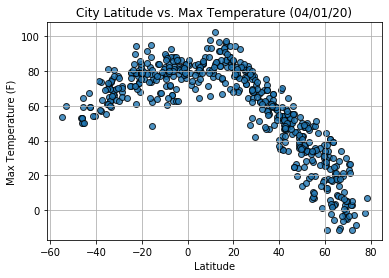

07/10/21


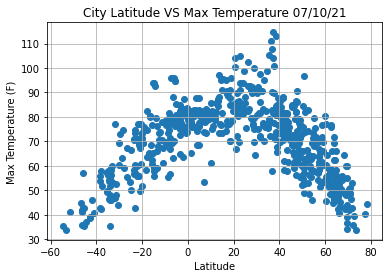

In [47]:
#time.strftime(format[, t])
#%D - same as %m/%d/%y
#create code for todays date
today = time.strftime("%m/%d/%y")
x_axis = city_data["Lat"]
y_axis = city_data["Max Temp"]
plt.scatter(x_axis, y_axis)

print (today)
plt.title(f"City Latitude VS Max Temperature {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("city lat vs temp.png")
plt.grid()
plt.show()

In the above scatter plot we are showing the correlation between each indvidule city's 
latitude and max temperature on the date shown. The highest temperatures are between a latitude range
of 20 to 40 degrees. The farther away the city is from this range temperature decreases.

## Latitude vs. Humidity Plot

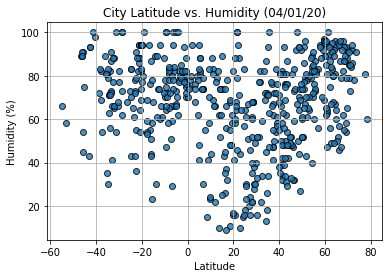

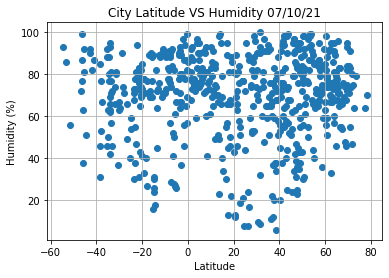

In [48]:
x_axis = city_data["Lat"]
y_axis = city_data["Humidity"]
plt.scatter(x_axis, y_axis)

plt.title(f"City Latitude VS Humidity {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("city lat vs Humidity")
plt.grid()
plt.show()

In the above scatter plot we are showing the correlation between each indvidule city's latitude vs humidity.
There seems to be no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

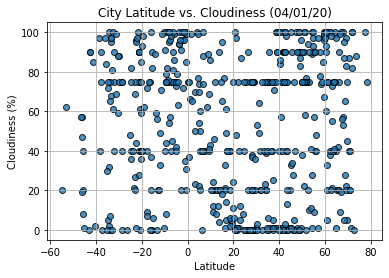

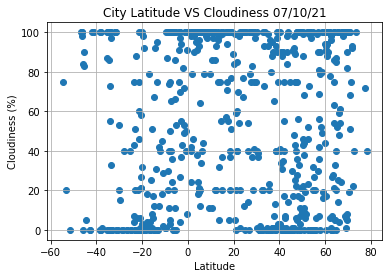

In [105]:
x_axis = city_data["Lat"]
y_axis = city_data["Cloudiness"]
plt.scatter(x_axis, y_axis)

plt.title(f"City Latitude VS Cloudiness {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("city lat vs cloudiness.png")
plt.grid()
plt.show()

In the above scatter plot we are showing the correlation between each indvidule city's latitude vs Cloudiness.
There seems to be no correlation between latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

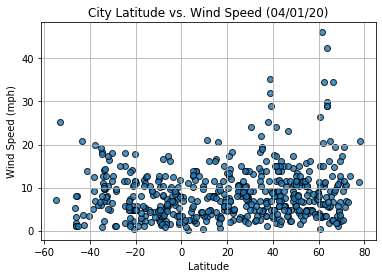

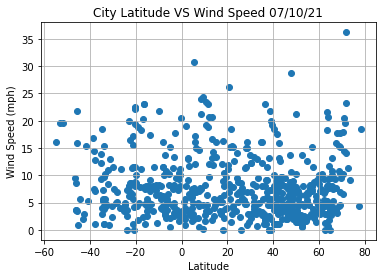

In [106]:
x_axis = city_data["Lat"]
y_axis = city_data["Wind Speed"]
plt.scatter(x_axis, y_axis)

plt.title(f"City Latitude VS Wind Speed {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("city lat vs Wind Speed.png")
plt.grid()
plt.show()

In the above scatter plot we are showing the correlation between each indvidule city's latitude vs Wind Speed.
Regardless of latitude most city"s Wind Speed is below 10 (mph).

## Linear Regression

In [70]:
North = city_data.loc[city_data["Lat"]>0]
South  = city_data.loc[city_data["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


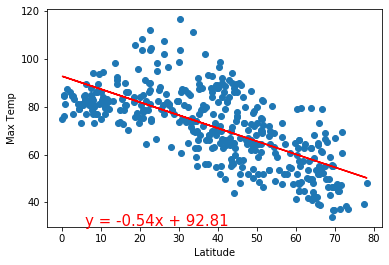

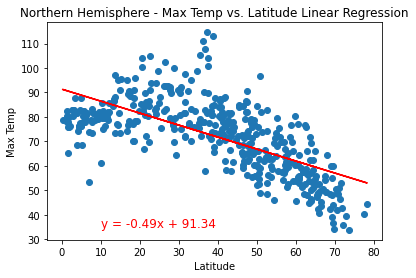

the r-value is: 0.4445033124423323


In [83]:
x_axis = North["Lat"]
y_axis = North["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=12,color="red")


plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Northern Hem Regrss.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The r-value is: 0.6082708688906918


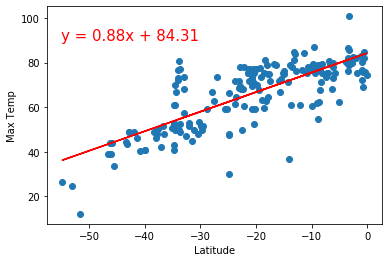

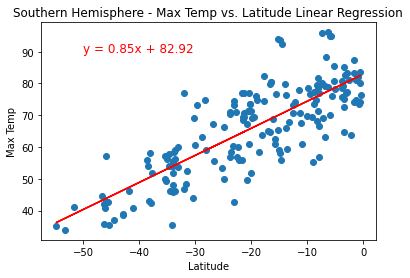

the r-value is: 0.6432848272013004


In [84]:
x_axis = South["Lat"]
y_axis = South["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=12,color="red")


plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("Southern Hem Regrss.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The two graphs show the correlation between the latitude and temperature within the Northern and Southern Hemispheres.
The farther you are away from 0 degrees the more the temperature drops.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


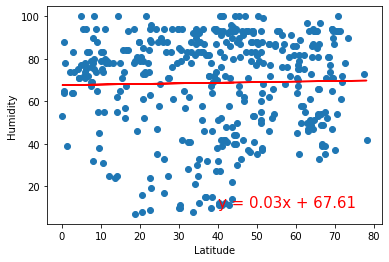

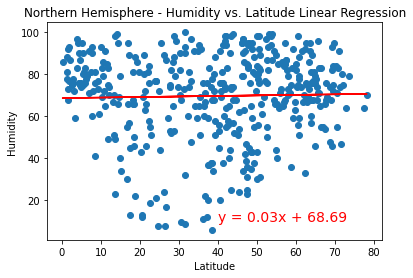

the r-value is: 0.0006262450654848202


In [88]:
x_axis = North["Lat"]
y_axis = North["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=14,color="red")


plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Northern Hem Humidity.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


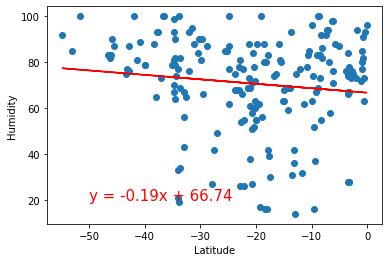

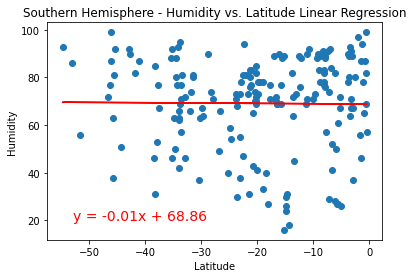

the r-value is: 9.315338758296046e-05


In [93]:
x_axis = South["Lat"]
y_axis = South["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-53,20),fontsize=14,color="red")


plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Southern Hem Humidity.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The two graphs show the correlation between the latitude and humidity within the Northern and Southern Hemispheres.
There is no correlation between latitude and humidity. The humidity on both hemispheres for most cities seem to be 
around 70%.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


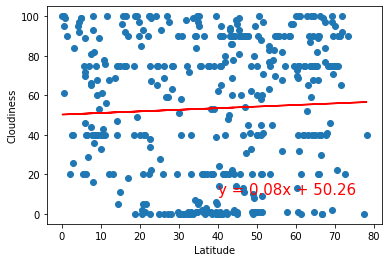

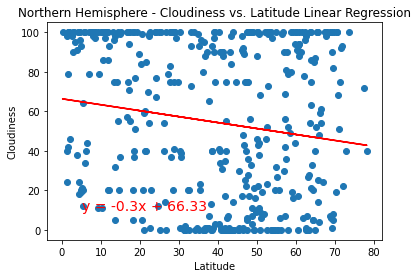

the r-value is: 0.02385248926915879


In [95]:
x_axis = North["Lat"]
y_axis = North["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=14,color="red")


plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Northern Hem Cloudiness.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


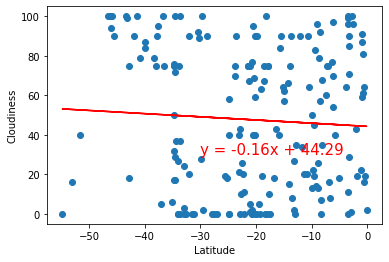

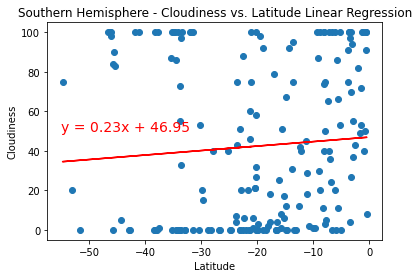

the r-value is: 0.005817713346078839


In [99]:
x_axis = South["Lat"]
y_axis = South["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=14,color="red")


plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Southern Hem Cloudiness.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The two graphs show the correlation between the latitude and cloudiness within the Northern and Southern Hemispheres.
There is no correlation between latitude and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


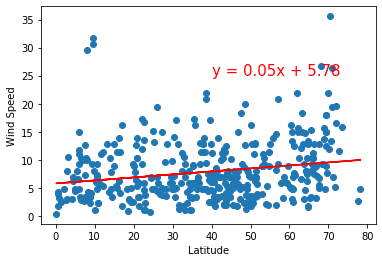

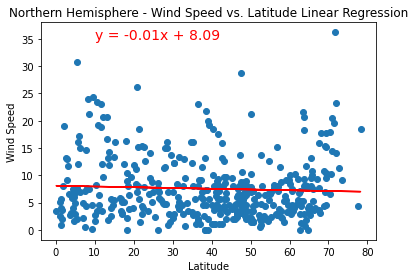

the r-value is: 0.0024581186032327494


In [101]:
x_axis = North["Lat"]
y_axis = North["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=14,color="red")


plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Northern Hem Wind Speed.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


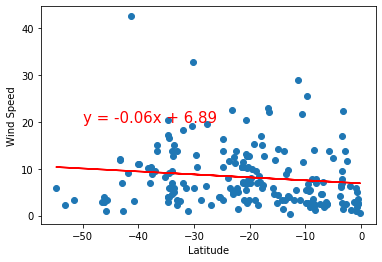

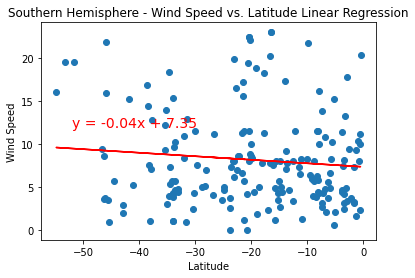

the r-value is: 0.009875197041241516


In [103]:
x_axis = South["Lat"]
y_axis = South["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept


line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-52,12),fontsize=14,color="red")


plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("Southern Hem Wind Speed.png")

plt.show()
print(f"the r-value is: {rvalue**2}")

The two graphs show the correlation between the latitude and wind speed within the Northern and Southern Hemispheres.
There is no correlation between latitude and wind speed. The wind speed on the northern hemisphere for most cities seem to be 
below 15 mph. The wind speed for most cities in the southern hemisphere is below 10 mph.